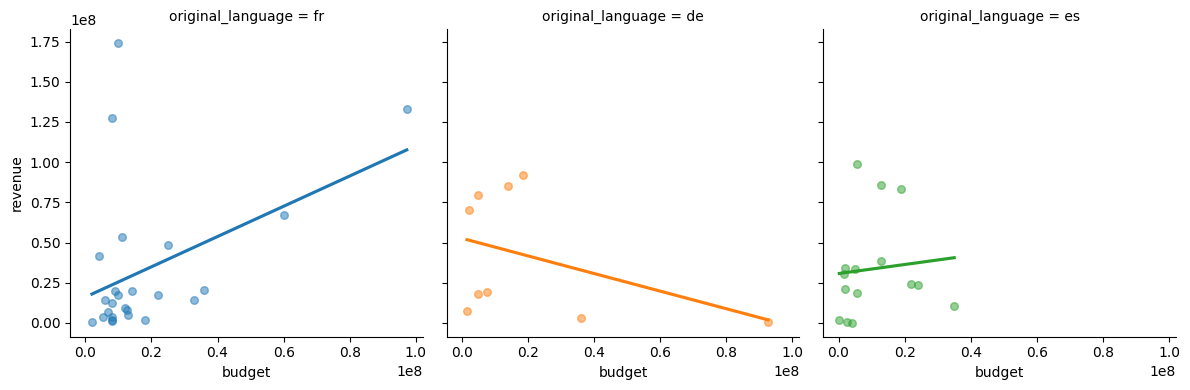

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando a base de dados
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")

# Filtrando os dados para as colunas desejadas
dados = tmdb[["title", "original_language", "budget", "revenue"]]
linguas = ["fr", "es", "de"]

# Mantendo dados com valores de receita e orçamento válidos e nas línguas desejadas (fr, es, de)
fr_es_de_com_revenue_e_budget = dados.query("revenue > 0 and budget > 0 and original_language == @linguas")

# Construindo o gráfico de dispersão mais a reta de regressão linear para cada caso
sns.lmplot(data=fr_es_de_com_revenue_e_budget, x="budget", y="revenue", col="original_language",
           hue="original_language", ci=None, height=4, scatter_kws={"s": 30, "alpha": 0.5})

In [ ]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


In [ ]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)

4803 4505 298


In [ ]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

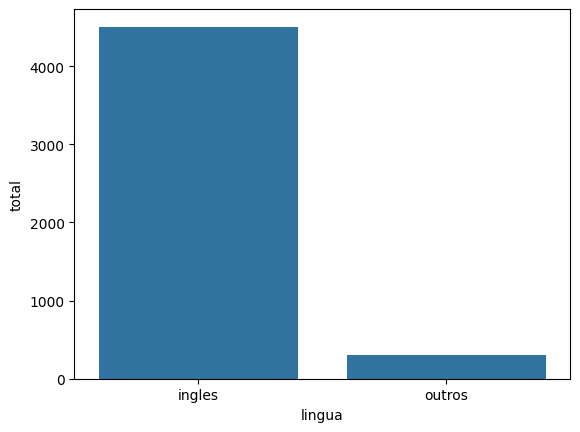

In [ ]:
sns.barplot(data=dados, x='lingua', y='total')

In [ ]:
total_linguas_outros = tmdb.query("original_language != 'en'")["original_language"].value_counts()
total_linguas_outros

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

<Axes: xlabel='original_language', ylabel='count'>

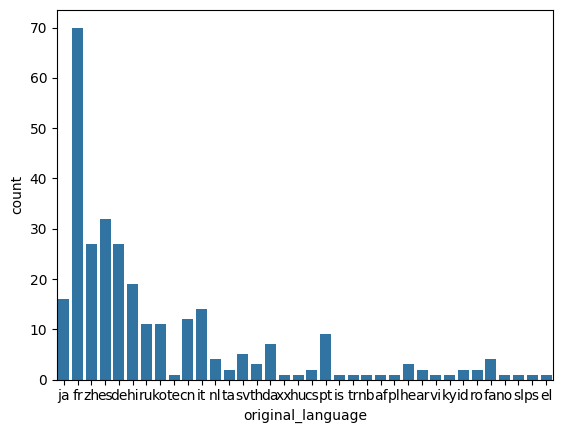

In [ ]:
sns.countplot(data=tmdb.query("original_language !='en'"), x="original_language")

Text(0.5, 1.0, 'Distribuicao da lingua original nos filmes exceto em ingles')

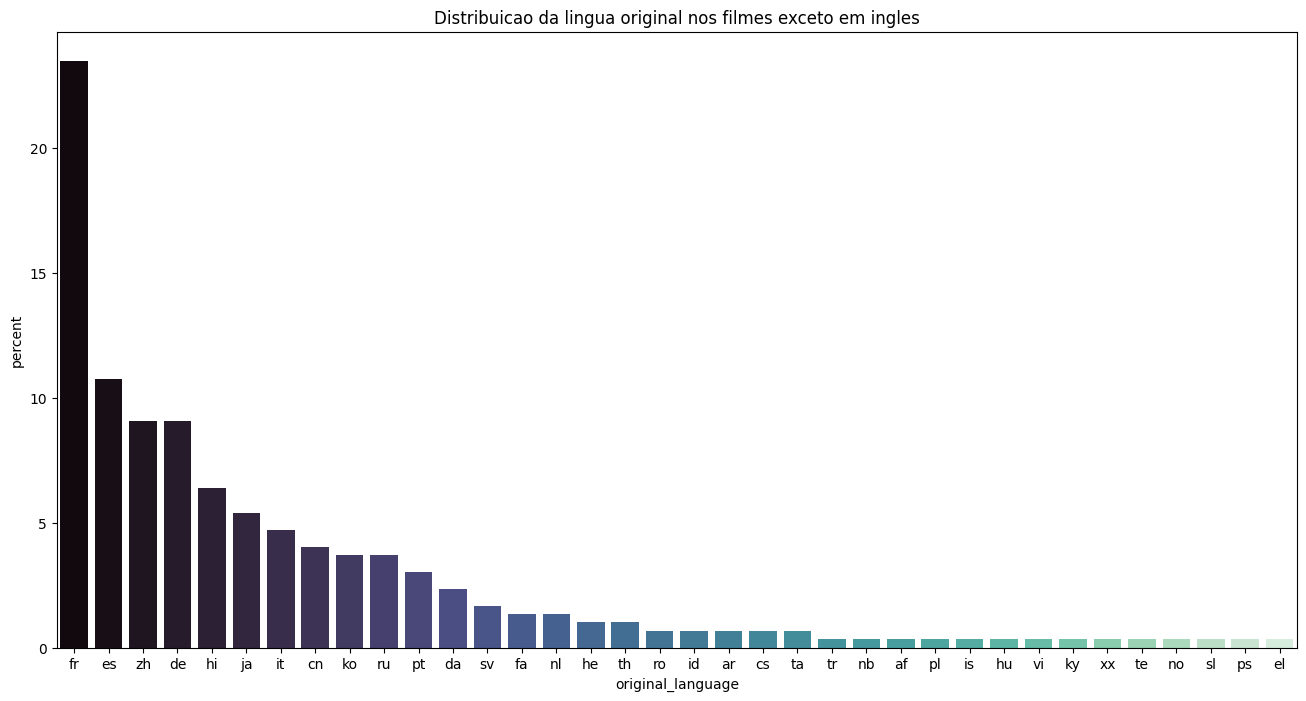

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=tmdb.query("original_language !='en'"),
              order=total_linguas_outros.index,
              palette="mako",
              stat="percent",
              hue="original_language",
              hue_order=total_linguas_outros.index,
              x="original_language")
plt.title("Distribuicao da lingua original nos filmes exceto em ingles")


In [ ]:
tmdb.query("original_language != 'en'")["original_language"].value_counts(normalize = True)

original_language
fr    0.234899
es    0.107383
zh    0.090604
de    0.090604
hi    0.063758
ja    0.053691
it    0.046980
cn    0.040268
ko    0.036913
ru    0.036913
pt    0.030201
da    0.023490
sv    0.016779
fa    0.013423
nl    0.013423
he    0.010067
th    0.010067
ro    0.006711
id    0.006711
ar    0.006711
cs    0.006711
ta    0.006711
tr    0.003356
nb    0.003356
af    0.003356
pl    0.003356
is    0.003356
hu    0.003356
vi    0.003356
ky    0.003356
xx    0.003356
te    0.003356
no    0.003356
sl    0.003356
ps    0.003356
el    0.003356
Name: proportion, dtype: float64